# Let's get started!

In [ ]:
# importing pandas as pd 
import pandas as pd 
  
# dictionary of lists 
dict = {'name':["code_file_1", "code_file_2", "code_file_3", "code_file_4"], 
        'calling_to': ["code_file_2.func_grtg", "code_file_4.func_3rdfd", "code_file_2.func_fdv4ds", "code_file_1.func_34r3dw"], 
        'called_by':["code_file_2.func_5h5tg", "code_file_1.func_trffd", "code_file_4.func_asdc", "code_file_3.func_avad"]} 
  
df = pd.DataFrame(dict) 
  
#print(df) 
df

,name,calling_to,called_by
0,code_file_1,code_file_2.func_grtg,code_file_2.func_5h5tg
1,code_file_2,code_file_4.func_3rdfd,code_file_1.func_trffd
2,code_file_3,code_file_2.func_fdv4ds,code_file_4.func_asdc
3,code_file_4,code_file_1.func_34r3dw,code_file_3.func_avad


In [ ]:
df

,name,calling_to,called_by
0,code_file_1,code_file_2.func_grtg,code_file_2.func_5h5tg
1,code_file_2,code_file_4.func_3rdfd,code_file_1.func_trffd
2,code_file_3,code_file_2.func_fdv4ds,code_file_4.func_asdc
3,code_file_4,code_file_1.func_34r3dw,code_file_3.func_avad


In [ ]:
df[['name', 'calling_to']].values

array([['code_file_1', 'code_file_2.func_grtg'],
       ['code_file_2', 'code_file_4.func_3rdfd'],
       ['code_file_3', 'code_file_2.func_fdv4ds'],
       ['code_file_4', 'code_file_1.func_34r3dw']], dtype=object)

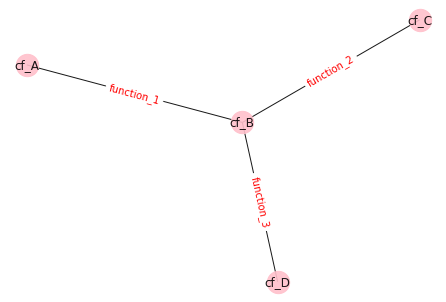

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

edges = [['cf_A','cf_B'],['cf_B','cf_C'],['cf_B','cf_D']]


G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()    

nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\

labels={node:node for node in G.nodes()})

# nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
# ('B','C'):'BC',('B','D'):'BD'},font_color='red')

nx.draw_networkx_edge_labels(G,pos,edge_labels={('cf_A','cf_B'):'function_1', \
('cf_B','cf_C'):'function_2',('cf_B','cf_D'):'function_3'},font_color='red')

plt.axis('off')
plt.show()

#nx.draw_networkx(G) 

# Calling function number on edge

To create any graph, first of first, we need to specify `(node 1, node 2, attributes...)`

eg.`G.add_edge('code_file_1','code_file_2', label ='func_1', weight=1)`

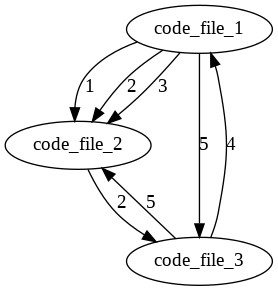

In [ ]:
# show weights of each edge, we can also use it to show the number of function calling

import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

G=nx.MultiDiGraph()  # or DiGraph, MultiGraph, MultiGraph, etc

G.add_edge('code_file_1','code_file_2', label ='func_1', weight=1)   # can add as much as attrbute you want on edge
G.add_edge('code_file_1','code_file_2', label ='func_2', weight=2)
G.add_edge('code_file_1','code_file_2', label ='func_3', weight=3)
G.add_edge('code_file_3','code_file_1', label ='func_2', weight=4)
G.add_edge('code_file_3','code_file_2', label ='func_5', weight=5)
G.add_edge('code_file_2','code_file_3', label ='func_5', weight=2)
G.add_edge('code_file_1','code_file_3', label ='func_5', weight=5)

#for edge in G.edges(data=True): edge[2]['label'] = edge[2]['label']
for edge in G.edges(data=True): edge[2]['label'] = edge[2]['weight']  # chose edge lable you want todisplay

node_label = nx.get_node_attributes(G,'id')
pos = nx.spring_layout(G)

p=nx.drawing.nx_pydot.to_pydot(G)
p.write_png('multi.png')
Image(filename='multi.png')

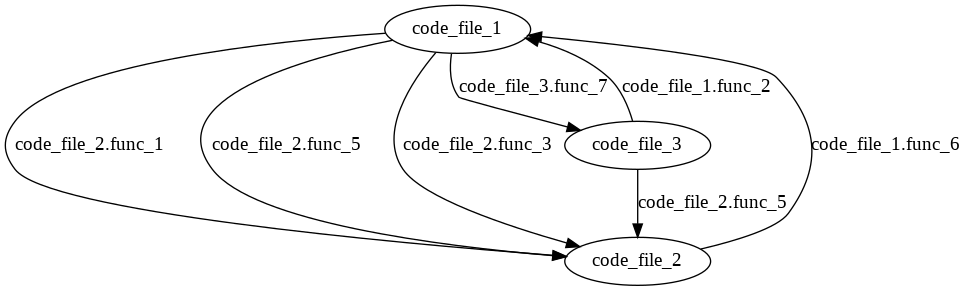

In [ ]:
# show the functions calling relationship

import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

G=nx.MultiDiGraph()  # or DiGraph, MultiGraph, MultiGraph, etc

G.add_edge('code_file_1','code_file_2', label ='code_file_2.func_1', weight=1)
G.add_edge('code_file_1','code_file_2', label ='code_file_2.func_5', weight=2)
G.add_edge('code_file_1','code_file_2', label ='code_file_2.func_3', weight=3)
G.add_edge('code_file_3','code_file_1', label ='code_file_1.func_2', weight=4)
G.add_edge('code_file_3','code_file_2', label ='code_file_2.func_5', weight=5)
G.add_edge('code_file_2','code_file_1', label ='code_file_1.func_6', weight=5)
G.add_edge('code_file_1','code_file_3', label ='code_file_3.func_7', weight=5)

# G.edges(data=True)   # data=True means showing edge detailed attributes

for edge in G.edges(data=True): edge[2]['label'] = edge[2]['label']
#for edge in G.edges(data=True): edge[2]['label'] = edge[2]['weight']

node_label = nx.get_node_attributes(G,'id')
pos = nx.spring_layout(G)

p=nx.drawing.nx_pydot.to_pydot(G)
p.write_png('multi.png')
Image(filename='multi.png')

## Seach callig functions on edge

eg. if we are supposed to modify `code_file_2.func_5`, which upsstrean and downstring code files are potentially impacted.

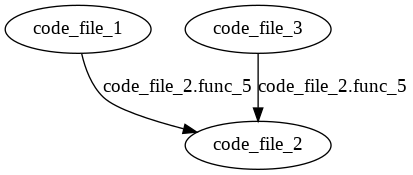

In [ ]:
# seach callig functions on edge
search_function = ((u,v,d) for u,v,d in G.edges(data = True) if d['label']=='code_file_2.func_5')

#G.edges(data = True)
G = nx.MultiDiGraph()

for edge in search_function:
  
  G.add_edge(edge[0], edge[1], label = edge[2]['label'], weight= edge[2]['weight'])

for edge in G.edges(data=True): edge[2]['label'] = edge[2]['label']
#for edge in G.edges(data=True): edge[2]['label'] = edge[2]['weight']

node_label = nx.get_node_attributes(G,'id')
pos = nx.spring_layout(G)

p=nx.drawing.nx_pydot.to_pydot(G)
p.write_png('multi.png')
Image(filename='multi.png')

In [ ]:
list(G.neighbors('code_file_3'))

['code_file_1', 'code_file_2']

In [ ]:
list(G.in_edges('code_file_1', data=True))

[('code_file_3', 'code_file_1', {'label': 'code_file_1.func_2', 'weight': 4}),
 ('code_file_2', 'code_file_1', {'label': 'code_file_1.func_6', 'weight': 5})]

## Files are calling 'code_file_1'

we can check `in_edge` and `out-edge` of node `code_file_1`

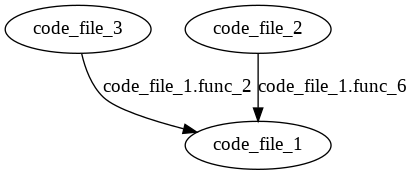

In [ ]:
# check which files are calling 'code_file_1'

in_edge = list(G.in_edges('code_file_1', data=True))   

import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image

G=nx.MultiDiGraph()  # or DiGraph, MultiGraph, MultiGraph, etc

# G.add_edge('code_file_1','code_file_2', label ='code_file_2.func_1', weight=1)
# G.add_edge('code_file_1','code_file_2', label ='code_file_2.func_5', weight=2)
# G.add_edge('code_file_1','code_file_2', label ='code_file_2.func_3', weight=3)
# G.add_edge('code_file_3','code_file_1', label ='code_file_1.func_2', weight=4)
# G.add_edge('code_file_3','code_file_2', label ='code_file_2.func_5', weight=5)
# G.add_edge('code_file_2','code_file_1', label ='code_file_2.func_6', weight=5)

for edge in in_edge:
  
  G.add_edge(edge[0], edge[1], label = edge[2]['label'], weight = edge[2]['weight'])


for edge in G.edges(data=True): edge[2]['label'] = edge[2]['label']
#for edge in G.edges(data=True): edge[2]['label'] = edge[2]['weight']

node_label = nx.get_node_attributes(G,'id')
pos = nx.spring_layout(G)

p=nx.drawing.nx_pydot.to_pydot(G)
p.write_png('multi.png')
Image(filename='multi.png')

In [ ]:
list(G.out_edges('code_file_3', data=True))

[('code_file_3', 'code_file_1', {'label': 'code_file_1.func_2', 'weight': 4})]

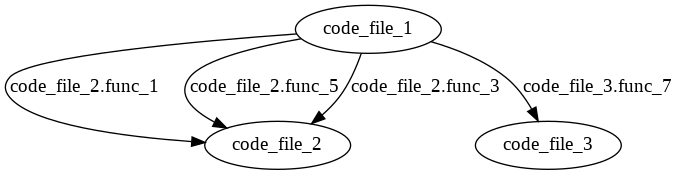

In [ ]:
w

In [ ]:
out_edge_pair = [(x[0], x[1]) for x in out_edge]


In [ ]:
from collections import Counter

out_edge_pair_freq = Counter(out_edge_pair).items()
out_edge_pair_freq

dict_items([])

In [ ]:
G.edges

OutMultiEdgeView([('code_file_1', 'code_file_2', 0), ('code_file_1', 'code_file_3', 0)])

## Display the number of functions calling to files

{('code_file_1',
  'code_file_2'): Text(0.24999996274709668, 0.43301271829021687, '3'),
 ('code_file_1',
  'code_file_3'): Text(0.2500000372529033, -0.43301270835610933, '1')}

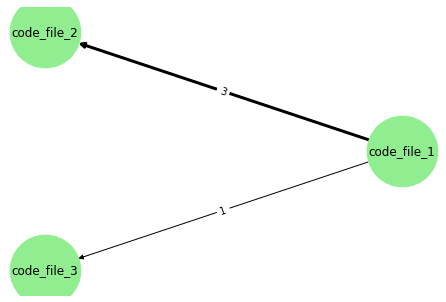

In [ ]:
# display the number of functions calling to files, the width of edge dependes on such calling number

G = nx.MultiDiGraph()
# G.add_edge(0,1,color='r',weight=2)
# G.add_edge(1,2,color='g',weight=4)
# G.add_edge(2,3,color='b',weight=6)
# G.add_edge(3,4,color='y',weight=3)
# G.add_edge(4,0,color='m',weight=1)

for edge in out_edge_pair_freq:
  G.add_edge(edge[0][0], edge[0][1], width = edge[1])


#colors = nx.get_edge_attributes(G,'color').values()
width = nx.get_edge_attributes(G,'width').values()

pos = nx.circular_layout(G)
nx.draw(G, pos, 
        #edge_color=colors, 
        width=list(width),
        with_labels=True,
        node_color='lightgreen',
        node_size = 5000
        )

labels = dict(out_edge_pair_freq)

nx.draw_networkx_edge_labels(G, 
                             pos, 
                             edge_labels=labels)

# nx.draw_networkx_edge_labels(G,pos,edge_labels={('cf_A','cf_B'):'function_1', \
# ('cf_B','cf_C'):'function_2',('cf_B','cf_D'):'function_3'},font_color='red')

In [ ]:
#list(((u,v,d) for u,v,d in G.edges(data = True) if d['label']=='code_file_2.func_5'))

后续任务：

1. 最大联通子图，去除不相关群体
2. 单源最短路径，计算出一度人脉、二度人脉关系等
3. 标签传播分类，一旦一个文件变化了，别的文件受影响的可能性, 属于community detection

附注：Girvan-Newman Algorithm for Community Detection    
[链接](https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/)

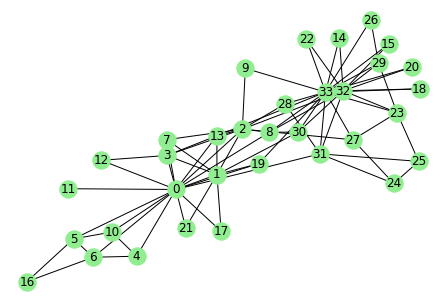

In [ ]:
import networkx as nx

# load the graph
G = nx.karate_club_graph()

# visualize the graph
nx.draw(G, 
        with_labels = True,
        node_color='lightgreen'
        )


Zachary 网络是通过对一个美国大学空手道俱乐部进行观测而构建出的一个社会网络.网络包含 34 个节点和 78 条边,其中个体表示俱乐部中的成员,而边表示成员之间存在的友谊关系.空手道俱乐部网络已经成为复杂网络社区结构探测中的一个经典问题[1]

In [ ]:
len(G.nodes), len(G.edges)

(34, 78)

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]

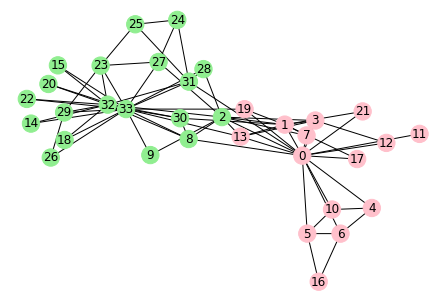

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('pink')
    else: 
        color_map.append('lightgreen')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

附：Perform Fraud Detection with Personalized Page Rank

[链接](https://www.sicara.ai/blog/2019-01-09-fraud-detection-personalized-page-rank)

{'a': 0.16427735492172726,
 'b': 0.09901018278546114,
 'c': 0.19633266592443938,
 'd': 0.04172090081806634,
 'e': 0.2421341823332377,
 'f': 0.051453728681800225,
 'g': 0.11189635503540132,
 'h': 0.09317462949986657}


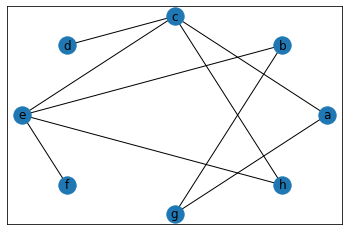

In [ ]:
import itertools	
import pprint	
import random	

import networkx as nx	
import pandas as pd	
from matplotlib import pyplot as plt	


fraud = pd.DataFrame({	
    'individual': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],	
    'fraudster': [1, 0, 0, 0, 1, 0, 0, 0]	
})	

# Generate Networkx Graph	
G = nx.Graph()	
G.add_nodes_from(fraud['individual'])	

# randomly determine vertices	
for (node1, node2) in itertools.combinations(fraud['individual'], 2):	
    if random.random() < 0.5:	
        G.add_edge(node1, node2)	

# Draw generated graph	
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True)	

# Compute Personalized Page Rank	# Compute Personalized Page Rank
personalization = fraud.set_index('individual')['fraudster'].to_dict()
ppr = nx.pagerank(G, alpha=0.85, personalization=personalization)
pprint.pprint(ppr)

plt.show()

In [ ]:
from networkx.algorithms import community
def label_propagation_community(G):
    communities_generator = list(community.label_propagation_communities(G))
    m = []
    for i in communities_generator:
        m.append(list(i))
    return m

g=label_propagation_community(G)
print(g)

[[32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30], [16, 5, 6], [0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31]]


## Dijkstra算法 (Shortest Path Problem)
![](https://miro.medium.com/max/1750/1*-ticoOKuuQKdP1QEJ8jl5Q.jpeg)

就拿上图来说，假如直到的路径和长度已知，那么可以使用dijkstra算法计算途中所有节点之间的最短距离。
![](https://miro.medium.com/max/1750/1*L0LCUBg5rvClSNkjboKX2Q.jpeg)
这种graph也可以转化为matrix 矩阵形态：
![](https://miro.medium.com/max/1750/1*WNbDFovvqBNSVYM9AQSkHw.jpeg)
![](https://miro.medium.com/max/1750/1*KuADShFJmKLkGEmw5S5zLw.jpeg)
参考资料：[Network Optimization(1): Shortest Path Problem](https://medium.com/swlh/network-optimization-1-shortest-path-problem-3757a67a129c)

代码1：

In [2]:
def dijkstra(nodes, distances):
    # These are all the nodes which have not been visited yet
    unvisited = {node: None for node in nodes}
    # It will store the shortest distance from one node to another
    visited = {}
    current = 'B'
    # It will store the predecessors of the nodes
    currentDistance = 0
    unvisited[current] = currentDistance
    # Running the loop while all the nodes have been visited
    while True:
        # iterating through all the unvisited node
        for neighbour, distance in distances[current].items():
            # Iterating through the connected nodes of current_node (for 
            # example, a is connected with b and c having values 10 and 3
            # respectively) and the weight of the edges
            if neighbour not in unvisited: continue
            newDistance = currentDistance + distance
            if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
                unvisited[neighbour] = newDistance
        # Till now the shortest distance between the source node and target node 
        # has been found. Set the current node as the target node
        visited[current] = currentDistance
        del unvisited[current]
        if not unvisited: break
        candidates = [node for node in unvisited.items() if node[1]]
        current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]
    return visited
 

In [3]:
nodes = ('A', 'B', 'C', 'D', 'E', 'F', 'G')
distances = {
    'B': {'A': 5, 'D': 1, 'G': 2},
    'A': {'B': 5, 'D': 3, 'E': 12, 'F' :5},
    'D': {'B': 1, 'G': 1, 'E': 1, 'A': 3},
    'G': {'B': 2, 'D': 1, 'C': 2},
    'C': {'G': 2, 'E': 1, 'F': 16},
    'E': {'A': 12, 'D': 1, 'C': 1, 'F': 2},
    'F': {'A': 5, 'E': 2, 'C': 16}}
 
print(dijkstra(nodes, distances))

{'B': 0, 'D': 1, 'E': 2, 'G': 2, 'C': 3, 'A': 4, 'F': 4}


代码2：

In [4]:

class dijkstra:
    def __init__(self,G):
        self.G = G
        self._d_G = len(G);
        self._d = [float("inf")]*self._d_G
        self._l = [0]*self._d_G

        self._N = set([x+1 for x in range(self._d_G)])
        self._L = set()

    def _chooseIfromN(self):
        min_di = 0
        for i in self._N:
            if self._d[i-1]<=self._d[min_di-1]:
                min_di = i
        return min_di
    
    def _updateNL(self,i):
        self._N.remove(i)
        self._L.add(i)

    def _updateD(self,i):
        for idx in self._N:
            v = self.G[i-1][idx-1]
            if v>0:
                nv = self._d[i-1]+self.G[i-1][idx-1]
                if self._d[idx-1] > nv:
                    self._d[idx-1] = nv
                    self._l[idx-1] = i
                else:
                    continue 

    def checkRoute(self,s,f):
        route = []
        x = f
        while x!=s:
            route.append(self._l[x-1])
            x = self._l[x-1]
        
        route.reverse()
        route.append(f)
        return route
    
    def printRoute(self,s,f):
        print("node%d -> node%d : shortest-length: %2d ; path: "%(s,f,self._d[f-1]),self.checkRoute(s,f))

    def solve(self,start,goal):
        print("==============================")
        print("Solving for : Start at node%d, Goal at node%d"%(start,goal))
        print("==============================")
        self._d[start-1] = 0
        while self._N!=set():
            i = self._chooseIfromN()
            self._updateNL(i)
            self._updateD(i)
            print("remove node%d from N and insert into L"%i)
            print("̤N : "+str(self._N))
            print("L : "+str(self._L))
            print("d : "+str(self._d))
            print("l : "+str(self._l))
            print("==============================")
            if i == goal:
                break


def main():
    G = [[0,2,8,7,0,0],
         [2,0,4,6,5,0],
         [8,4,0,0,2,0],
         [7,6,0,0,0,3],
         [0,5,2,0,0,1],
         [0,0,0,3,1,0]]

    solver = dijkstra(G)
    start = 1
    goal  = 6
    solver.solve(start,goal)
    solver.printRoute(start,goal)

if __name__== "__main__":
    main()

Solving for : Start at node1, Goal at node6
remove node1 from N and insert into L
̤N : {2, 3, 4, 5, 6}
L : {1}
d : [0, 2, 8, 7, inf, inf]
l : [0, 1, 1, 1, 0, 0]
remove node2 from N and insert into L
̤N : {3, 4, 5, 6}
L : {1, 2}
d : [0, 2, 6, 7, 7, inf]
l : [0, 1, 2, 1, 2, 0]
remove node3 from N and insert into L
̤N : {4, 5, 6}
L : {1, 2, 3}
d : [0, 2, 6, 7, 7, inf]
l : [0, 1, 2, 1, 2, 0]
remove node5 from N and insert into L
̤N : {4, 6}
L : {1, 2, 3, 5}
d : [0, 2, 6, 7, 7, 8]
l : [0, 1, 2, 1, 2, 5]
remove node4 from N and insert into L
̤N : {6}
L : {1, 2, 3, 4, 5}
d : [0, 2, 6, 7, 7, 8]
l : [0, 1, 2, 1, 2, 5]
remove node6 from N and insert into L
̤N : set()
L : {1, 2, 3, 4, 5, 6}
d : [0, 2, 6, 7, 7, 8]
l : [0, 1, 2, 1, 2, 5]
node1 -> node6 : shortest-length:  8 ; path:  [1, 2, 5, 6]


In [5]:
class FlowNetwork: 
    def __init__(self,graph): 
      # residual network
      self.graph = graph  
      self.n_node = len(graph) 
        
    def findForwardPath(self,s, t, flowPath): 
        visited =[False]*(self.n_node) 
        nodes=[] 
        nodes.append(s) 
        visited[s] = True
        while nodes: 
            u = nodes.pop(0) 
            for idx, forward in enumerate(self.graph[u]): 
                if (visited[idx] == False and forward > 0) : 
                    nodes.append(idx) 
                    visited[idx] = True
                    flowPath[idx] = u 
        if visited[t]:
          return True
        else:
          return False
              
    def FordFulkerson(self, source, sink): 
        flowPath = [-1]*(self.n_node) 
        max_flow = 0 
        while self.findForwardPath(source, sink, flowPath) : 
            forwardPath = float("Inf") 
            s = sink 
            while(s !=  source): 
              forwardPath = min (forwardPath, self.graph[flowPath[s]][s]) 
              s = flowPath[s] 
            max_flow +=  forwardPath 
            v = sink 
            while(v !=  source): 
                u = flowPath[v] 
                self.graph[u][v] -= forwardPath 
                self.graph[v][u] += forwardPath 
                v = flowPath[v] 
        return max_flow 
   
def main():
  graph = [[0, 8, 9, 5, 0], 
          [0, 0, 0, 7, 0], 
          [0, 4, 0, 0, 8], 
          [0, 0, 0 ,0, 6], 
          [0, 0, 0, 0, 0]] 
    
  network = FlowNetwork(graph) 
    
  source = 0; 
  sink = 4;
    
  print ("The maximum possible flow is %d ." % network.FordFulkerson(source, sink)) 

if __name__== "__main__":
  main()

The maximum possible flow is 14 .
